# 선형모델
- 입력 특성에 대한 선형 함수를 만들어서 예측을 수행

1) 회귀 선형모델
- y ̂=w[0]x[0]+w[1]x[1]+⋯+w[p]x[p]+b
- x[0]~x[p] : 하나의 데이터 포인트에 대한 특성
- w, b : 모델이 학습할 파라미터 y ̂  : 모델의 예측 값
- 타깃 y가 특성 x의 선형 조합이라는 것은 과도한 가정일 수 있으나, 특성이 많은 데이터셋에서는 선형 모델은 매우 훌륭한 성능을 낸다.

    1-1) 선형 회귀(linear regression) or 최소 제곱법 (ordinary least square)
    - 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 w,b를 찾는 것
    - 복잡도를 제어할 수 없음.
    
  1-2) 리지(Ridge)회귀
    - 가중치(w)의 모든 원소가 0에 가깝게 되도록.
    - 특성이 출력이 주는 영향을 최소화
    - L2 규제를 사용
    - alpha(default=1.0)값 조정을 통해 규제 조절 가능
    - alpha값 증가 -> 계수를 더 0에 가깝게 만든다 -> 더 일반화
    
  1-3) 라소(Lasso)회귀
    - L1 규제 사용
    - 계수가 실제로 0이 되는 경우도 있음.(모델에서 제외)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [3]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_",lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_ -0.031804343026759746


In [5]:
print("train set score:{:.2f}".format(lr.score(X_train,y_train)))
print("test set score:{:.2f}".format(lr.score(X_test,y_test)))
# train set 과 test set의 score 가 비슷
# 과소적합 상태임. 특성이 1가지이기 때문에 과대적합 걱정할 필요 없음

train set score:0.67
test set score:0.66


In [29]:
# 보스턴 주택 가격(특성 104개) 이용해서 test해보기
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [8]:
print("train set score:{:.2f}".format(lr.score(X_train,y_train)))
print("test set score:{:.2f}".format(lr.score(X_test,y_test)))
# 과대적합 상태임을 알 수 있음

train set score:0.95
test set score:0.61


리지회귀 예제

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("train set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge.score(X_test,y_test)))
# 위 최소 제곱법에 비해 test set score가 높게 측정된다. 특성 제한을 통해 더 일반화된 모델이 됨

train set score:0.89
test set score:0.75


In [15]:
# alpha 값 조정
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge10.score(X_test,y_test)))
print("ridge10 coef:",ridge10.coef_)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge01.score(X_test,y_test)))
print("ridge01 coef:",ridge01.coef_)

train set score:0.79
test set score:0.64
ridge10 coef: [-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.37100148e-01  4.76402917e-01 -9

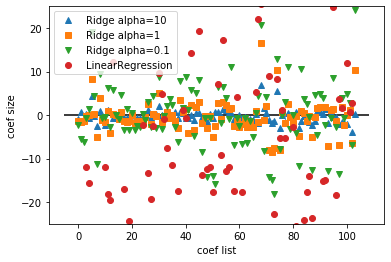

In [30]:
plt.plot(ridge10.coef_,'^',label = 'Ridge alpha=10')
plt.plot(ridge.coef_,'s',label = 'Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label = 'Ridge alpha=0.1')

plt.plot(lr.coef_,'o', label = 'LinearRegression')
plt.xlabel('coef list')
plt.ylabel('coef size')
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.ylim(-25,25)
plt.legend()

라소 회귀 예제

In [32]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("train set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("num of used coef:",np.sum(lasso.coef_ != 0))

train set score:0.29
test set score:0.21
num of used coef: 4


In [35]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train,y_train)
print("train set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("num of used coef:",np.sum(lasso001.coef_ != 0))

train set score:0.90
test set score:0.77
num of used coef: 33
